# Rates Books prediction 


# Project GOAL:

Using the "books.csv" dataset, we are going to train a model that predicts a book’s rating. 
First, we should understand data, what are the important factors that make a book more intersting than another one.

To do that! This project going include differents parts, such:

1- Exploratory analysis, cleaning and visualisation of the data, 

2- Data preprocessing, Feature engineering and selection,

3- Model training and evaluation.

4- Included Jupyter notebook Report

# DATA:

Our CSV books file, contains 12 columns that gives informations about the books.  Detailed information for each column is bellow:

1) bookID: A unique identification number for each book.

2) title: The name under which the book was published.

3) authors: The names of the authors of the book. Multiple authors are delimited by “/”.

4) average_rating: The average rating of the book received in total.

5) isbn: Another unique number to identify the book, known as the International Standard Book Number.

6) isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.

7) language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.

8) num_pages: The number of pages the book contains.

9) ratings_count: The total number of ratings the book received.

10) text_reviews_count: The total number of written text reviews the book received.

11) publication_date: The date the book was published.

12) publisher: The name of the book publisher.


# Start Project coding!

# Import/Install Libraries/Dependencies:

In [632]:
pip install plotly==5.9.0 

In [868]:
import os 
os.getcwd()

'C:\\Users\\YCH\\Documents\\Houda DSTI\\ML python'

In [837]:
%matplotlib inline
import keras as K
import squarify
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


In [874]:
print(K.__version__)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)


2.8.0
1.21.6
1.3.5
0.11.2


In [840]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=7db6a10bf2d75cd63e1bd7850c41d2b0ee89339361fbb4ae995c800ae18cdbb4
  Stored in directory: c:\users\ych\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn



In [841]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [842]:
import sklearn as sk

In [844]:
import sklearn.metrics as skm

In [838]:
#import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [876]:
#Check libraries versions in order to create the 'requirements.txt'
pip list

Package                            Version
---------------------------------- --------------------
Note: you may need to restart the kernel to use updated packages.
absl-py                            1.1.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.

In [880]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# 1)Data Analysis :

- Processing,

- Exploratory analysis,

- Cleaning,

- Ploting,



In [636]:
#Import data from the CSV file, bu using the Book id such an index column + drop bad lines:
df= pd.read_csv("books.csv", sep=",", index_col="bookID", on_bad_lines='skip')

In [637]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 11123 rows and 11 columns


Our file contain 11 column and 11123 lines.
Let's have more information about our data:

In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6     num_pages         11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [638]:
#Detecting NA:
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [641]:
df.authors.value_counts()

Stephen King                                              40
P.G. Wodehouse                                            40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Legs McNeil/Gillian McCain                                 1
Adam Woog                                                  1
Mikal Gilmore                                              1
Thich Nhat Hanh/Arnold Kotler/Dalai Lama XIV               1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: authors, Length: 6639, dtype: int64

In [719]:
#Let's have a look on our data 5 first rows:
df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [720]:
#5 tail rows:
df.tail(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [645]:
#Let's have a mathematical view of our data:
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In the describe section, we see that the mean of average rating is arround 4 and we can already see that the number or count of rating is not equivalent to the text reviews count.
We are going to check this hypothesis by next.

# Let's focus on Average rating!

This study is about Predicting Average rating! So let us have a look on 'average-rating' first before analysing any other relations.

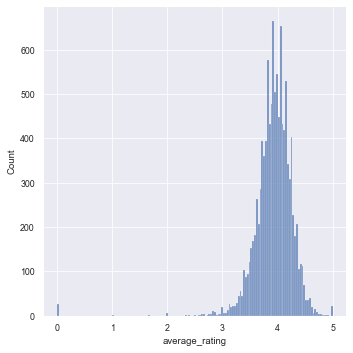

In [722]:
#Plot of average rating :
sns.displot(df.average_rating)

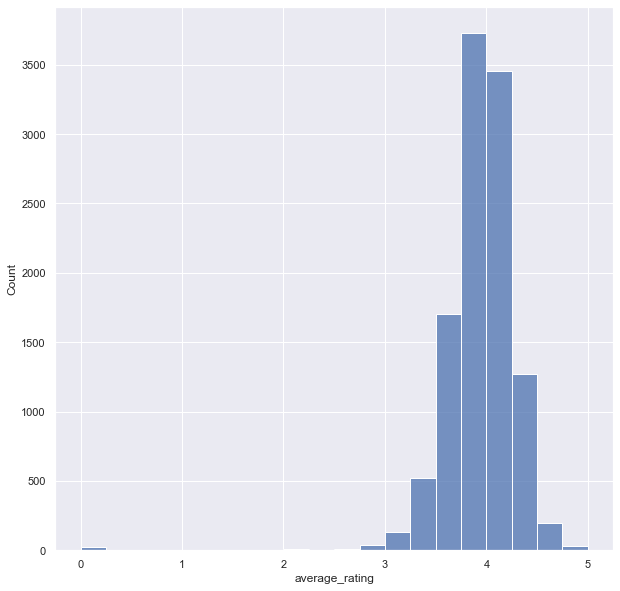

In [648]:
#Plot of average rating, more precisely:
plt.figure(figsize=(10,10))
rating= df.average_rating.astype(float)
sns.histplot(rating, bins=20)

In [649]:
#Average rating/ Mean:
df['average_rating'].mean()

# The Average rating is 3.93

3.934075339386829

Like we saw before, the average rate is concentrated arround 4 --> = 3.93.
But what about NULL values ? 

In [735]:
#Null values of average rating detection:
print('Count of total Average rating is => ',df.average_rating.sum())

print('Count of missing or NULL Average rating is => ',df.average_rating.isnull().value_counts())


Count of total Average rating is =>  43758.72
Count of missing or NULL Average rating is =>  False    11123
Name: average_rating, dtype: int64


About 25% of Average rating values are missing! Let's keep that on mind!

# Correlation table:
Relation between our columns

In [650]:
#Correlation table of data:
df.corr()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,-0.001965,0.150477,0.038224,0.033663
isbn13,-0.001965,1.000000,-0.009818,0.005494,0.008152
num_pages,0.150477,-0.009818,1.000000,0.034337,0.036977
ratings_count,0.038224,0.005494,0.034337,1.000000,0.865977
text_reviews_count,0.033663,0.008152,0.036977,0.865977,1.000000


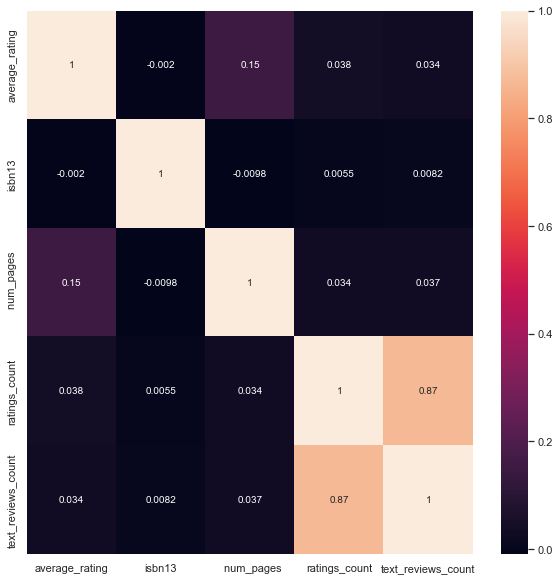

In [651]:
#Correlation table (More presentable):
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()




We see a very strong correlation between the 'ratings_count' and the 'text_reviews_count' = 0.87 -> ~ 87%. 
We can say that when a person writes a review  will probably also give a rate to the book.

On the other hand, we have a very weak correlation between others features. That's mean, we can get rid of many columns and just focus on ratings_count and the text_reviews_count.


In [737]:
#Rating count/ Mean, max and Min:
print('Count of Maximum Average rating is => ',df['ratings_count'].max())
print('Count of minimum Average rating is => ',df['ratings_count'].min())
print('Count of Average rating Mean is => ',df['ratings_count'].mean())


Count of Maximum Average rating is =>  4597666
Count of minimum Average rating is =>  0
Count of Average rating Mean is =>  17942.848062573048


In [738]:
print('Count of Maximum text_reviews_count is => ',df['text_reviews_count'].max())

Count of Maximum text_reviews_count is =>  94265


Rating_Count : Let's analyse the more rated books:

In [739]:
#Books with best big ratings counts:
Best_rated_books = df.sort_values(by="ratings_count", ascending = False).head(10)

Best_rated_titles = pd.DataFrame(Best_rated_books.title).join(pd.DataFrame(Best_rated_books.ratings_count))
Best_rated_titles



,title,ratings_count
bookID,,
41865,Twilight (Twilight #1),4597666
5907,The Hobbit or There and Back Again,2530894
5107,The Catcher in the Rye,2457092
960,Angels & Demons (Robert Langdon #1),2418736
5,Harry Potter and the Prisoner of Azkaban (Harr...,2339585
15881,Harry Potter and the Chamber of Secrets (Harry...,2293963
2,Harry Potter and the Order of the Phoenix (Har...,2153167
34,The Fellowship of the Ring (The Lord of the Ri...,2128944
7613,Animal Farm,2111750


C:\Users\YCH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



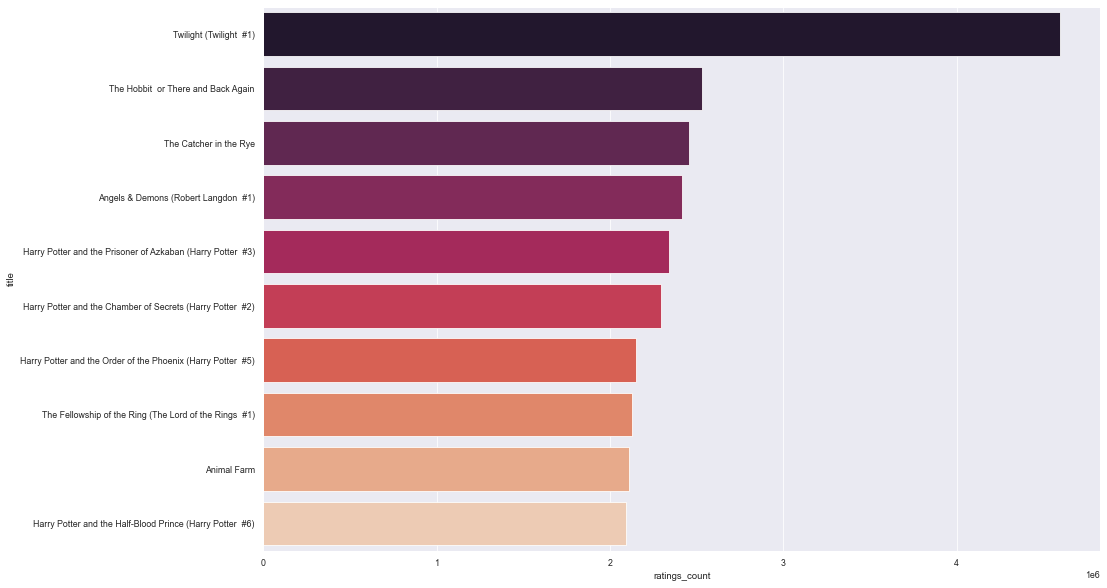

In [743]:
#Ploting:Best-rated-books:
Best_rated_books_Plot= Best_rated_books.set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(Best_rated_books_Plot['ratings_count'], Best_rated_books_Plot.index, palette='rocket')

text reviews counts: Let's analyse the books with max text reviews counts:

C:\Users\YCH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



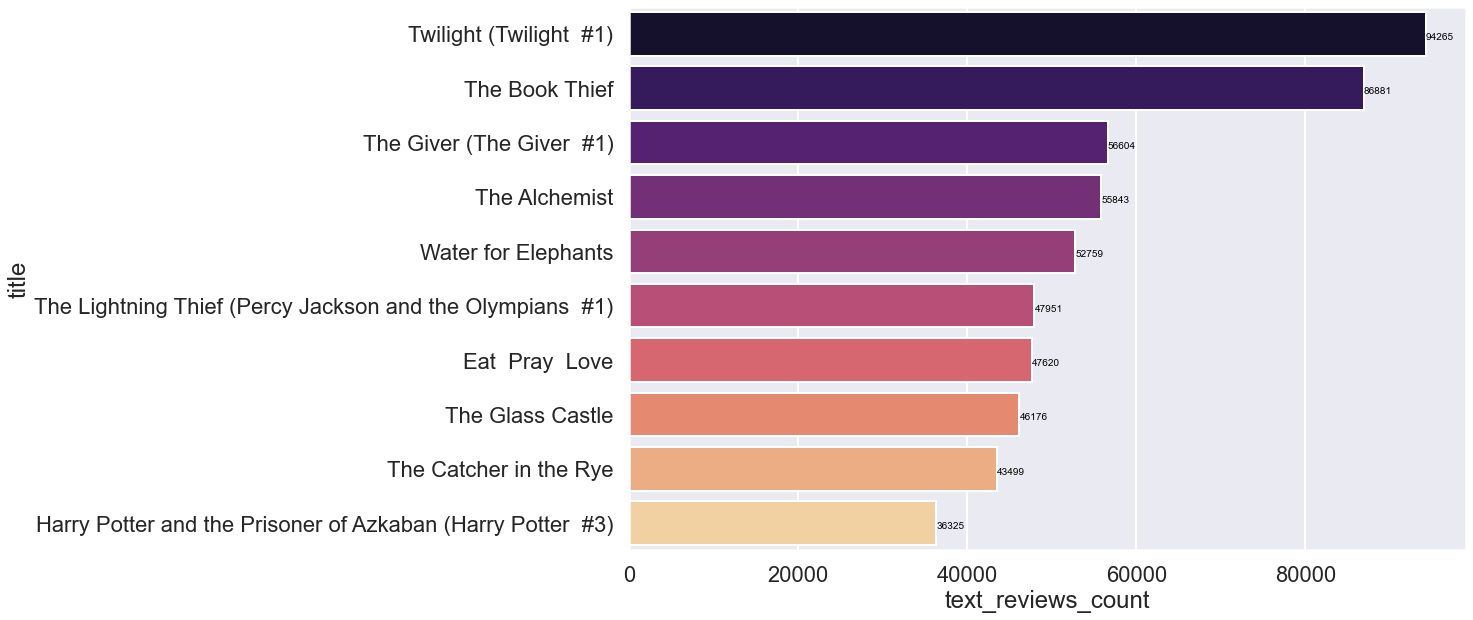

In [744]:
#Books with max text reviews counts + ploting:

most_text = df.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.set_context('poster')
ax = sns.barplot(most_text['text_reviews_count'], most_text.index, palette='magma')
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), fontsize=10,color='black')
plt.show()

We can see that the books with the best rates are not specially the books with max text review (Except for Twilight #1)

C:\Users\YCH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



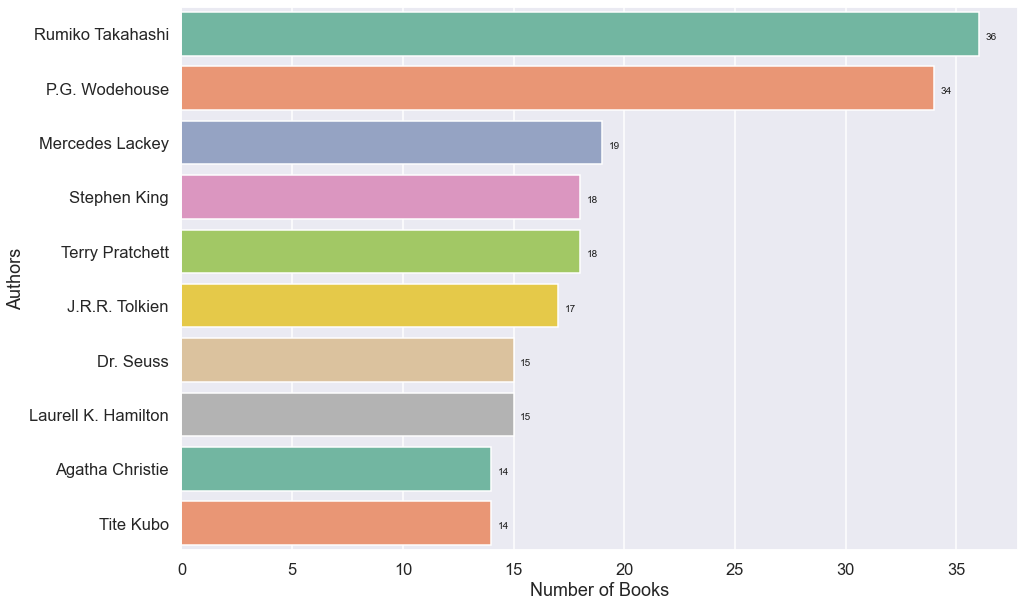

In [661]:
#High rated authors:
high_rated_author = df[df['average_rating']>=4]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

Let's check correlations between features:

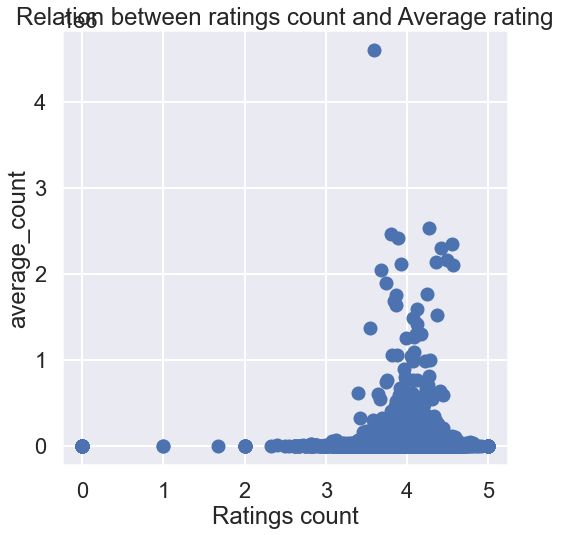

In [748]:
#Relation between Rating count and Average rating:

def scatter_plot(x, y, title, x_label, y_label):
    plt.subplots(figsize=(8, 8))
    plt.scatter(x,
                y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

ratings_count_and_average_count = "Relation between ratings count and Average rating"
ratings_count_label = "Ratings count"
text_reviews_count_label = "average_count"
scatter_plot(df.average_rating,
             df.ratings_count,
            ratings_count_and_average_count,ratings_count_label, text_reviews_count_label )

RMQ: There are a lot of outliers in our "Relation between ratings count and Average rating" plot . We can conclude that, there is no significant relation between average rating and the Ratings count, like is already shown in correlation table --> The correlation between average rating and the Ratings count is equal to 0.038 = Very weak correlation.
Let's remove this relation from the rest of our study.

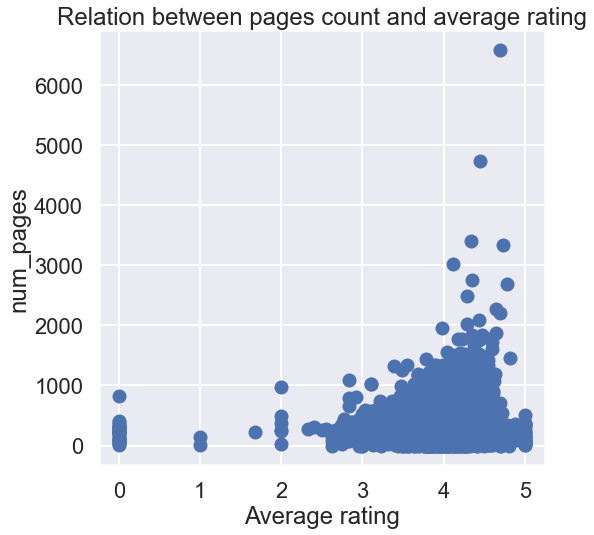

In [749]:
#Relation between Pages count and average rating

def scatter_plot(x, y, title, x_label, y_label):
    plt.subplots(figsize=(8, 8))
    plt.scatter(x,
                y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

num_pages_and_average_rating_title = "Relation between pages count and average rating"
average_rating_label = "Average rating"
num_pages_label = "num_pages"
scatter_plot(Df.average_rating,
             Df.num_pages,
            num_pages_and_average_rating_title, average_rating_label, num_pages_label)


RMQ: Same as previous study, There are a lot of outliers here in "Relation between pages count and average rating" plot. 
We can also conclude that is no significant relation between average rating and the count of books pages.
 
like is already shown in correlation table --> The correlation between average rating and the book pages number is equal to 0.15 = Very weak correlation. Let's also remove this relation from the rest of our study.


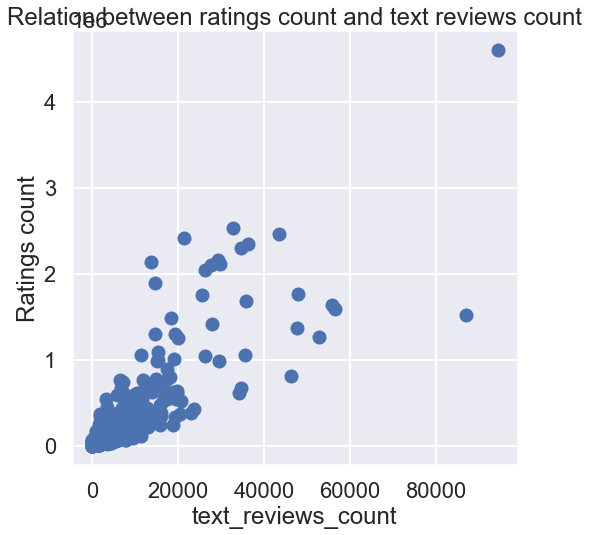

In [750]:
#Relation between rating count and text reviews count (Correlation is good, so let's check it):

def scatter_plot(x, y, title, x_label, y_label):
    plt.subplots(figsize=(8, 8))
    plt.scatter(x,
                y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

ratings_count_and_text_reviews_count = "Relation between ratings count and text reviews count"
average_rating_label = "text_reviews_count"
ratings_count_label = "Ratings count"
scatter_plot(df.text_reviews_count,
             df.ratings_count,
            ratings_count_and_text_reviews_count, average_rating_label, ratings_count_label)



There is a positive linear relation between 'text_reviews_count' and 'Ratings_count', that is, as 'text_reviews_count' increases, 'Ratings_count' increases as well.
So we have a positive correlation like already shown in the correlation table, where the correlation is equal to 0.87.

Note: we can also see some outliers.

Let's keep this relation for the rest of study.

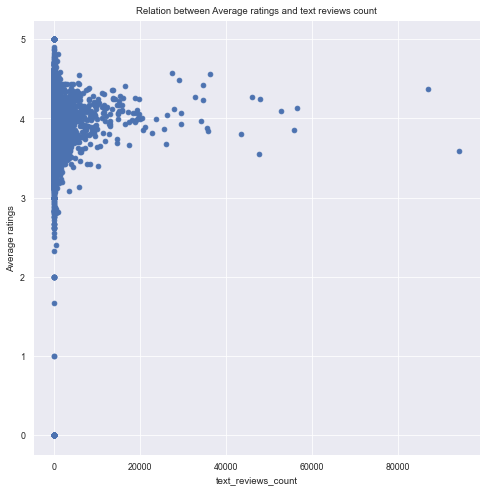

In [867]:
#Relation between average ratings and text reviews count (Correlation is good, so let's check it):

def scatter_plot(x, y, title, x_label, y_label):
    plt.subplots(figsize=(8, 8))
    plt.scatter(x,
                y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

Average_ratings_and_text_reviews_count = "Relation between Average ratings and text reviews count"
average_rating_label = "text_reviews_count"
ratings_count_label = "Average ratings "
scatter_plot(df.text_reviews_count,
             df.average_rating,
            Average_ratings_and_text_reviews_count, average_rating_label, ratings_count_label)

Most of values are concentrated between 0 and 20000 'text_reviex_count' for an average rating specially equal to ~4.
Note= there is no correlation between those features.

# Data Preprocessing /Feature Engineering

The aim of Data preprocessing,is to convert our data into machine-readable form that can be interpreted, analysed and used by machine learning algorithms.


In [665]:
#Let's check of our columns types:
df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [667]:
#Columns names:
print(df.columns)

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [668]:
#Replace the'  num_pages' to avoid any further problem:
Df= df.rename(columns={'  num_pages': 'num_pages'})
print('List of columns :', Df.columns)


List of columns : Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')


We previously saw, that the best rated books (Twilight, harry potter and others...) have a books collection..
Let's analyse it:

In [669]:
# Collection and Boxed books:
df_BOX_Collection = Df[~Df.title.str.contains('|'.join(['Collection', 'Boxed']))]
df_BOX_Collection

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


What about languages ? 

In [639]:
df.groupby(["language_code"]).mean().ratings_count
#We can see that there is more ratings for english books

language_code
ale        102.000000
ara        122.000000
en-CA     4086.714286
en-GB     2463.691589
en-US     3773.906960
eng      21570.272564
enm       3233.666667
fre       3277.319444
ger        234.727273
gla         11.000000
glg         36.000000
grc         52.454545
ita       3234.400000
jpn         68.304348
lat        114.666667
msa         28.000000
mul        386.631579
nl          67.000000
nor         86.000000
por        165.100000
rus       4477.000000
spa       4636.114679
srp          0.000000
swe       2671.000000
tur       1000.000000
wel          1.000000
zho         20.428571
Name: ratings_count, dtype: float64

In [670]:
# We can list all the different languages available
df_BOX_Collection.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

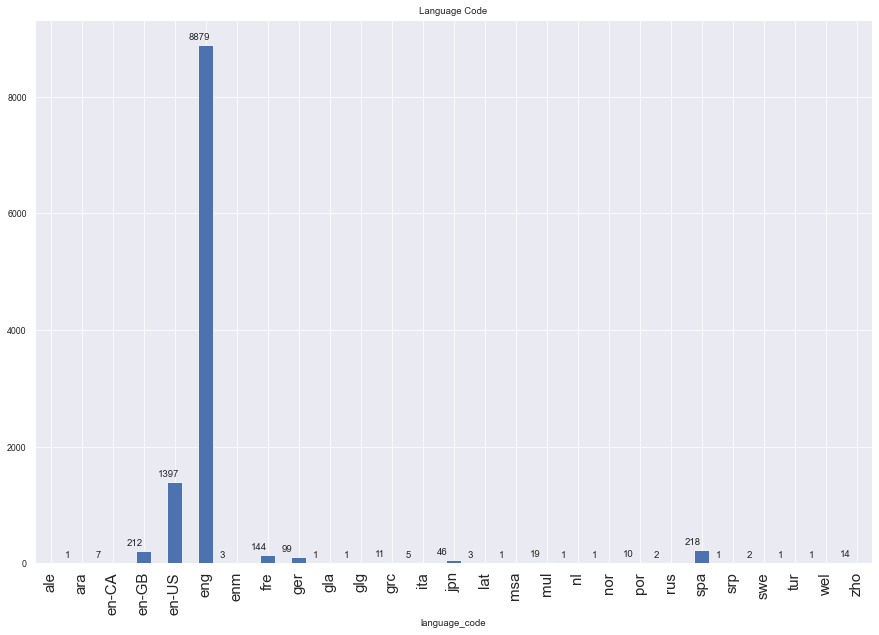

In [671]:
#books languages PLOT:
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df_BOX_Collection.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))



NOTE: We have different kind of english : 'en-CA','en-GB','en-US','eng' and 'enm'
We can regroup them


In [804]:
#Regroup all english books to 1 = eng and European books to Eur:
df_Language_Group = df_BOX_Collection.replace(to_replace =["en-CA", "en-GB", "en-US", "enm"], value ="eng")


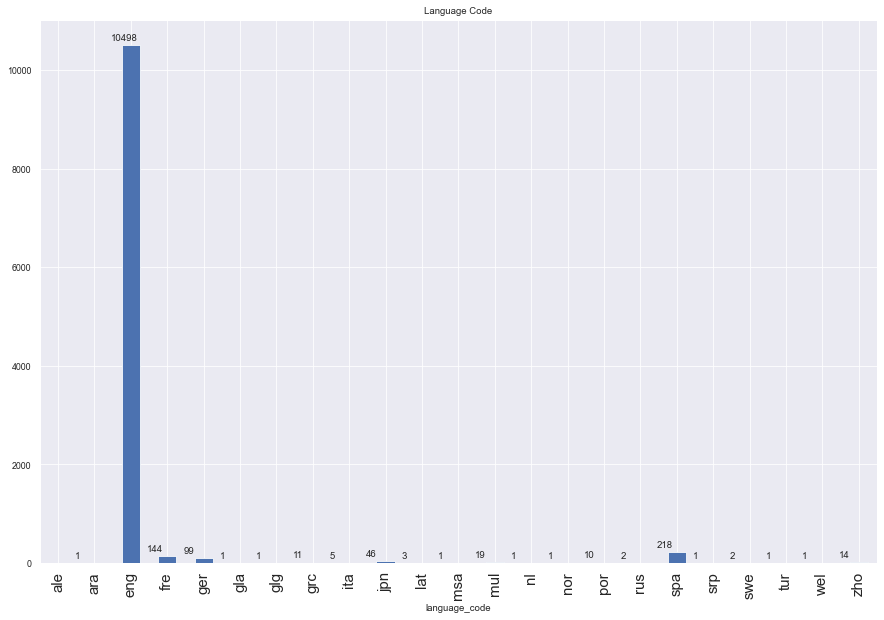

In [805]:
#books languages = Regrouped:
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df_Language_Group.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

In [806]:
#Check the columns names:
print(df_Language_Group.columns)

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')


In [807]:
#Book's pages numbers:

#Mean of pages number:
df_Language_Group['num_pages'].mean()


335.11975453478925

In [808]:
df_Language_Group[df_Language_Group["num_pages"] == 0]
#We going to replace books that have 0 for number of pages by the mean of number of pages 

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers
2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...
40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,1/1/2005,Tantor Media
41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,11/19/1995,Random House Value Publishing
43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,12/1/1999,Simon & Schuster Audio


There is about 71 rows of missing values of books pages number.

In [809]:
#Replace 0 values by the mean of nb of pages.
df_Language_Group.num_pages = df_Language_Group.num_pages.replace(0, np.nan)
df_Language_Group.num_pages .fillna(float(df_Language_Group.num_pages.mean()), inplace=True)


In [810]:
#Check if still have some 0 in our data.
df_Language_Group[df_Language_Group["num_pages"] == 0]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,


Text(0.5, 1.0, 'Boxplot of number of pages')

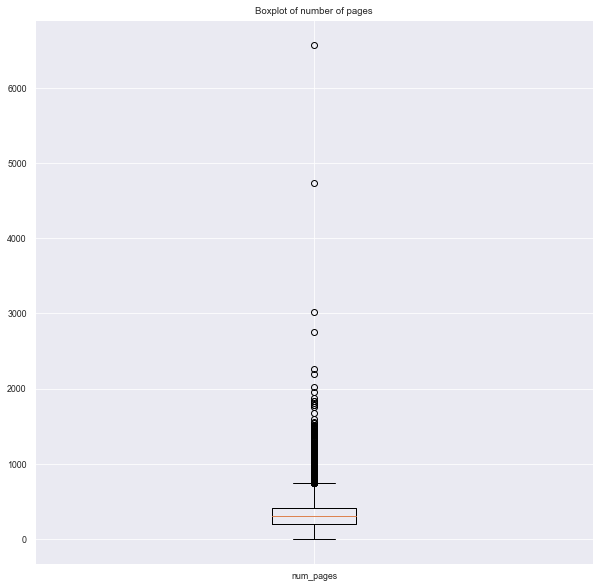

In [811]:
#Plotting the pages numbers:
plt.subplots(figsize=(10,10))
plt.boxplot(df_Language_Group.num_pages)
plt.xticks([1], ["num_pages"])
plt.title("Boxplot of number of pages")

#The number of pages is concentrated mostly arround 0 and 3000.

Text(0.5, 1.0, 'Boxplot of number of pages')

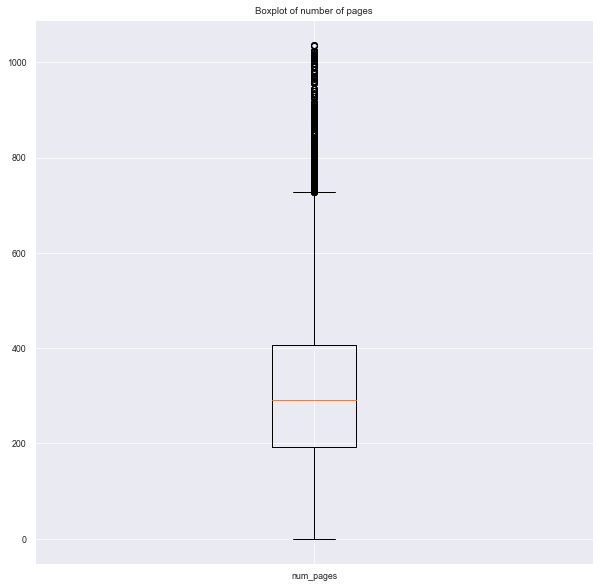

In [812]:
#Get rid from outliers:
df_nb_pages = df_Language_Group[(np.abs(stats.zscore(df_Language_Group['num_pages'])) < 3)]
plt.subplots(figsize=(10,10))
plt.boxplot(df_num_pages.num_pages)
plt.xticks([1], ["num_pages"])
plt.title("Boxplot of number of pages")

Note: The mean of pages numbers is arround 300 pages.

Text(0.5, 1.0, 'Boxplot of ratings count')

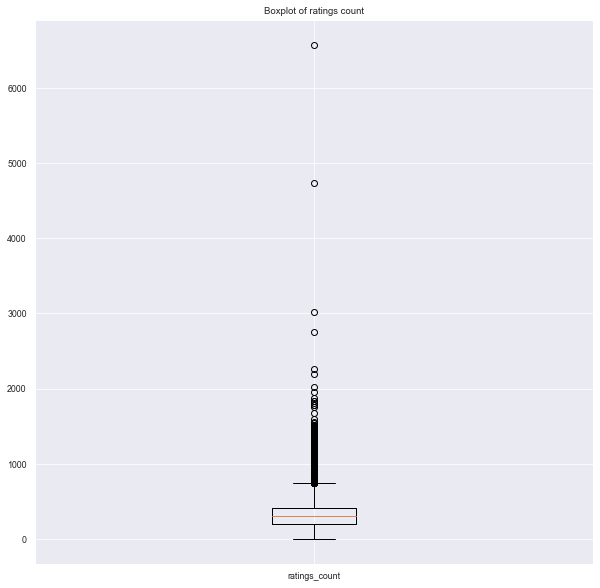

In [813]:
#Rating count:
plt.subplots(figsize=(10,10))
plt.boxplot(df_Language_Group.num_pages)
plt.xticks([1], ["ratings_count"])
plt.title("Boxplot of ratings count")

#The rating count is concentrated mostly arround 0 and 2500.

C:\Users\YCH\AppData\Local\Temp/ipykernel_7632/2043585891.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Boxplot of ratings count')

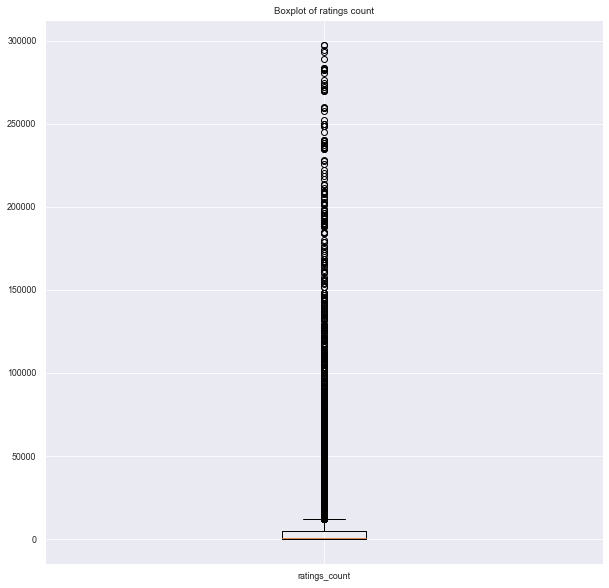

In [814]:
#Reduce outliers of Ratings count:
df_ratings_count = df_nb_pages[(np.abs(stats.zscore(df_num_pages['ratings_count'])) < 2.5)]

plt.subplots(figsize=(10,10))
plt.boxplot(df_ratings_count.ratings_count)
plt.xticks([1], ["ratings_count"])
plt.title("Boxplot of ratings count")

Text(0.5, 1.0, 'Boxplot of reviews count')

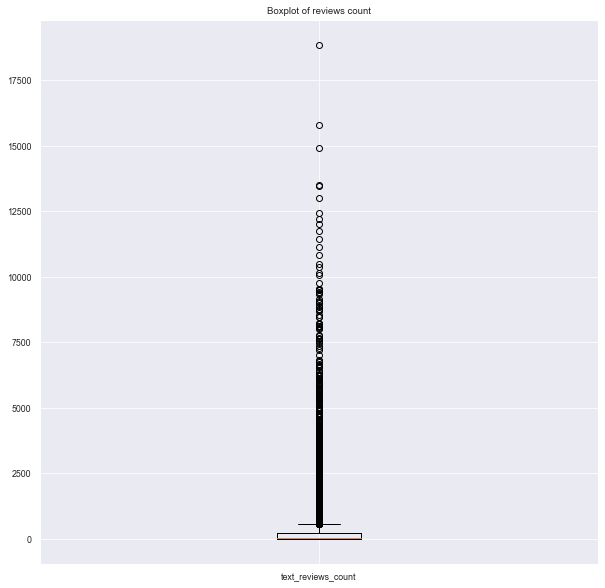

In [815]:
#Reviews count:
plt.subplots(figsize=(10,10))
plt.boxplot(df_ratings_count.text_reviews_count)
plt.xticks([1], ["text_reviews_count"])
plt.title("Boxplot of reviews count")

Text(0.5, 1.0, 'Boxplot of reviews count')

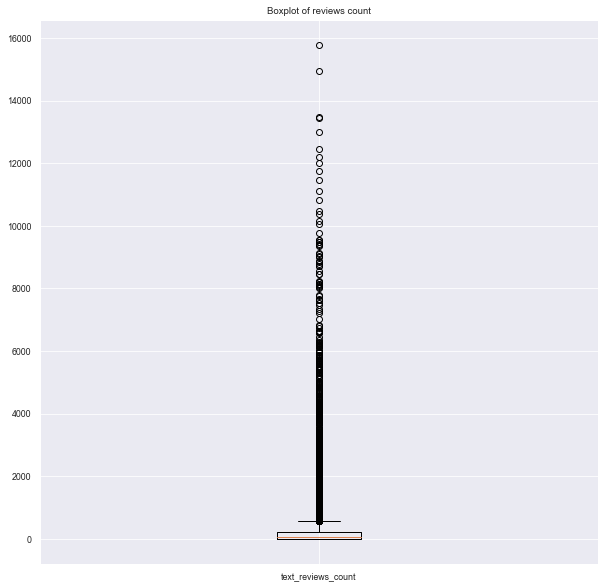

In [816]:
#Reduce outliers:
df_text_reviews_count = df_ratings_count[(np.abs(stats.zscore(df_ratings_count['text_reviews_count'])) < 15)]
plt.subplots(figsize=(10,10))
plt.boxplot(df_text_reviews_count.text_reviews_count)
plt.xticks([1], ["text_reviews_count"])
plt.title("Boxplot of reviews count")

In [817]:
Data = df_text_reviews_count

In [818]:
Data.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352.0,6333,244,11/1/2003,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152.0,19,1,4/26/2005,Nimble Books
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815.0,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815.0,249558,4080,4/30/2002,Del Rey Books
14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215.0,4930,460,8/3/2004,Crown


In [819]:
#Data.drop(['isbn13','isbn','publication_date','publisher'],axis=1,inplace=True)
Data.shape

(10790, 11)

In [820]:
#Clean Data: We do not need the books ref, such that ISBN and ISBN13
#Let's focus on the columns with with good correlation and those gives informations about the book:
Data = Data.drop(columns=["title","authors","isbn","isbn13","publisher","publication_date"])
Data.head(5)

,average_rating,language_code,num_pages,ratings_count,text_reviews_count
bookID,,,,,
4,4.42,eng,352.0,6333,244
9,3.74,eng,152.0,19,1
12,4.38,eng,815.0,3628,254
13,4.38,eng,815.0,249558,4080
14,4.22,eng,215.0,4930,460


In [821]:
Data.index

Int64Index([    4,     9,    12,    13,    14,    16,    18,    21,    22,
               23,
            ...
            45617, 45623, 45625, 45626, 45630, 45631, 45633, 45634, 45639,
            45641],
           dtype='int64', name='bookID', length=10790)

# Data encoding


get_dummies tranforms categorical data to numbers
here we want to transform the "Language" column from ['eng', 'fr', etc...] to [0,1]


In [822]:

Data = pd.concat([Data,pd.get_dummies(Data.language_code, drop_first=False, prefix='lang')],axis=1).drop(columns="language_code")


In [823]:
Data.dtypes

average_rating        float64
num_pages             float64
ratings_count           int64
text_reviews_count      int64
lang_ale                uint8
lang_ara                uint8
lang_eng                uint8
lang_fre                uint8
lang_ger                uint8
lang_gla                uint8
lang_glg                uint8
lang_grc                uint8
lang_ita                uint8
lang_jpn                uint8
lang_lat                uint8
lang_msa                uint8
lang_mul                uint8
lang_nl                 uint8
lang_nor                uint8
lang_por                uint8
lang_rus                uint8
lang_spa                uint8
lang_srp                uint8
lang_swe                uint8
lang_tur                uint8
lang_wel                uint8
lang_zho                uint8
dtype: object

In [824]:
Data.head(5)

,average_rating,num_pages,ratings_count,text_reviews_count,lang_ale,lang_ara,lang_eng,lang_fre,lang_ger,lang_gla,...,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho
bookID,,,,,,,,,,,,,,,,,,,,,
4,4.42,352.0,6333,244,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.74,152.0,19,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,4.38,815.0,3628,254,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,4.38,815.0,249558,4080,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,4.22,215.0,4930,460,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model - Linear Regression


Regression (linear and logistic)
Regression is one of the most popular methods in statistics. Regression analysis estimates relationships among variables, finding key patterns in large and diverse data sets and how they relate to each other.

For our case we predict a countinuous value --> we see if there is a relationship between 2 variables (or more) and try to predict one of them, by using Linear regression.


In [825]:
data_train, data_test = train_test_split(Data,test_size = 0.2, random_state = 10)

In order to test the rating books of our model, we split the dataset into training and testing sets. Essentially, we train the model on the training set and then predict the values with the testing set.
Here, I split the data into 80% training and 20% test, meaning that the model will learn the pattern by 80% training data, and then predict the rates values with 20% testing data. 

In [826]:
print(len(Data))
print(len(data_train))
print(len(data_test))

10790
8632
2158


In [827]:
data_train

,average_rating,num_pages,ratings_count,text_reviews_count,lang_ale,lang_ara,lang_eng,lang_fre,lang_ger,lang_gla,...,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho
bookID,,,,,,,,,,,,,,,,,,,,,
21324,4.27,160.0,18799,568,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43616,3.68,304.0,137,11,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32349,3.79,187.0,11224,1249,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28671,3.82,672.0,337,46,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22061,3.55,96.0,76,5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38643,4.20,208.0,500,54,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29019,4.23,32.0,2552,103,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4947,4.05,32.0,2114,166,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [828]:
data_train.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count',
       'lang_ale', 'lang_ara', 'lang_eng', 'lang_fre', 'lang_ger', 'lang_gla',
       'lang_glg', 'lang_grc', 'lang_ita', 'lang_jpn', 'lang_lat', 'lang_msa',
       'lang_mul', 'lang_nl', 'lang_nor', 'lang_por', 'lang_rus', 'lang_spa',
       'lang_srp', 'lang_swe', 'lang_tur', 'lang_wel', 'lang_zho'],
      dtype='object')

In [829]:
# get the values of the columns for the training data
X_train = data_train.loc[:,[  'num_pages', 'ratings_count', 'text_reviews_count',
       'lang_ale', 'lang_ara', 'lang_eng', 'lang_fre', 'lang_ger', 'lang_gla',
       'lang_glg', 'lang_grc', 'lang_ita', 'lang_jpn', 'lang_lat', 'lang_msa',
       'lang_mul', 'lang_nl', 'lang_nor', 'lang_por', 'lang_rus', 'lang_spa',
       'lang_srp', 'lang_swe', 'lang_tur', 'lang_wel', 'lang_zho']].values
y_train = data_train.average_rating.values

In [830]:
# get the values of the columns for the test data
X_test = df_test.loc[:,[  'num_pages', 'ratings_count', 'text_reviews_count',
       'lang_ale', 'lang_ara', 'lang_eng', 'lang_fre', 'lang_ger', 'lang_gla',
       'lang_glg', 'lang_grc', 'lang_ita', 'lang_jpn', 'lang_lat', 'lang_msa',
       'lang_mul', 'lang_nl', 'lang_nor', 'lang_por', 'lang_rus', 'lang_spa',
       'lang_srp', 'lang_swe', 'lang_tur', 'lang_wel', 'lang_zho']].values
y_test = data_test.average_rating.values

In [848]:
from sklearn.linear_model import LogisticRegression

In [849]:
# here we initialize the model=Linear Regression!
lr_model = LinearRegression()


In [850]:
# here we train the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [851]:
#predictions = lr.predict(X_test)
y_test_predicted = lr.predict(X_test)

In [852]:
y_test_predicted

array([4.26153502, 4.06293362, 3.94970934, ..., 3.93043434, 3.92284128,
       3.93851385])

In [853]:
y_test

array([4.29, 4.38, 4.09, ..., 4.1 , 4.  , 3.59])

In [861]:
#(y_test_predicted == y_test).sum()/len(y_test)

In [855]:
#Let's predict 15 values:
predict = pd.DataFrame({'Real rate': y_test.tolist(), 'Predicted rate': y_test_predicted.tolist()})
predict.head(15)

,Real rate,Predicted rate
0,4.29,4.261535
1,4.38,4.062934
2,4.09,3.949709
3,4.09,3.916168
4,3.97,3.955477
5,4.13,3.912754
6,4.09,3.919385
7,4.22,4.261772
8,4.23,3.934019
9,3.57,3.882002


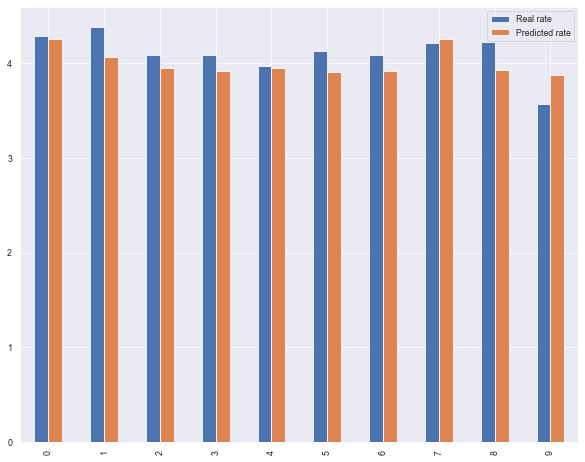

In [862]:
# visualise the prediction
predict= predict.head(10)
predict.plot(kind='bar', figsize=(10, 8))

Text(0, 0.5, 'Predicted Y')

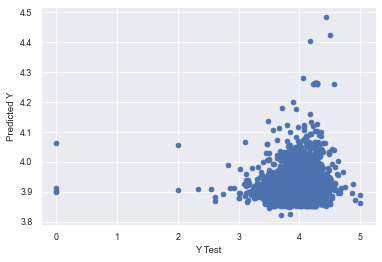

In [856]:
plt.scatter(y_test,y_test_predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

We can see that the dots are concentrated around the value 4 on the x-axis 'Real data', and between 3.9 and 4 on the y-axis 'Predicted values'.

# Evaluating the Model (Metric):

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).
Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 


In [858]:
import sklearn.metrics as metrics

The basic concept of accuracy evaluation in regression analysis is that comparing the original target 'y_test' with the predicted one 'y_test_predicted' and applying metrics like MAE, MSE and RMSE to explain the errors and predictive ability of the model.
Comparing these metrics:

    MAE is the easiest to understand, because it’s the average error.
    MSE is more popular than MAE, because MSE “punishes” larger errors, which tends to be useful in the real world.
    RMSE is even more popular than MSE, because RMSE is interpretable in the “y” units.

All of these are loss functions, because we want to minimize them.

In [859]:
# evaluate the performance of our algorithm:
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))



MAE: 0.22363127370132813
MSE: 0.11087727072775415
RMSE: 0.3329823880143725


Let's explore the residuals to make sure everything okay with our books data and that we have gotten a good model.

C:\Users\YCH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



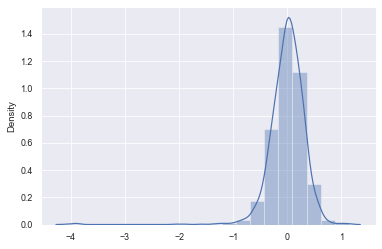

In [863]:
#Check the residual:

sns.distplot(y_test - y_test_predicted,bins=20)



The histogram of the residuals looks normally distributed!

In [864]:
#Library for Residual plot:
import seaborn as sns

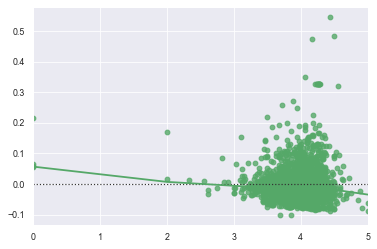

In [866]:
#Examining Predicted vs. Residual “The Residual Plot”:
sns.residplot(y_test, y_test_predicted,lowess=True, color="g")  
plt.show()

This method is used to plot the residuals of our linear model. This method will regress y_test on y_test_predicted and then draw a scatter plot of the residuals.
In the plot, each point is a book rate, where the prediction made by the model is on the x-axis and the accuracy of the prediction is on the y-axis. The distance from the line at 0 is how bad the prediction was for the book rate.
So we can conclude that our books rates are essentially concentrated arround 3 and 5, and arround the line 0, between -0.1 and 0.2 -> That's mean that our model is good.